In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score as auc
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_auc_score as auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
#! apt-get install git
#! git clone https://github.com/davidunga/ml-2024.git
#!python /content/ml-2024/data.py

In [2]:
#df=pd.read_csv("/content/ml-2024/data/diabetic_data.csv")
df=pd.read_csv("/home/labs/nyosef/elibe/ML_healthcare/data/dataset_diabetes/diabetic_data.csv")
print(df.shape)
df.head()

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
import custom_classes_and_functions as ccf

In [8]:
"""
#same result as ccf.complete_pp
df2,y=ccf.InitialPP_func(df,return_y=True)
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, random_state=42)
pipe=ccf.CompletePipeline(df2,ohe=True)
X_train=pipe.fit_transform(X_train)
X_test=pipe.transform(X_test)
X_test=ccf.make_df_from_pipeline_result(X_test,df2)
X_train=ccf.make_df_from_pipeline_result(X_train,df2)#"""


'\n#same result as ccf.complete_pp\ndf2,y=ccf.InitialPP_func(df,return_y=True)\nX_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, random_state=42)\npipe=ccf.CompletePipeline(df2,ohe=True)\nX_train=pipe.fit_transform(X_train)\nX_test=pipe.transform(X_test)\nX_test=ccf.make_df_from_pipeline_result(X_test,df2)\nX_train=ccf.make_df_from_pipeline_result(X_train,df2)#'

In [4]:
X_train, X_test, y_train, y_test,fn= ccf.complete_pp(df,ohe=True,sqrt=True)
X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts()

df.shape = (69970, 50)
df.readmitted.value_counts: readmitted
False    63693
True      6277
Name: count, dtype: int64
Feature Engineering...
Sqrt transformation...
Feature Engineering...
Sqrt transformation...


((55976, 63),
 (13994, 63),
 readmitted
 False    50954
 True      5022
 Name: count, dtype: int64,
 readmitted
 False    12739
 True      1255
 Name: count, dtype: int64)

In [5]:
fn

array(['num__age_int', 'num__time_in_hospital', 'num__number_emergency',
       'num__number_inpatient', 'num__number_outpatient',
       'num__num_lab_procedures', 'num__num_procedures',
       'num__num_medications', 'num__number_diagnoses',
       'num__med_abs_change', 'num__med_up_change',
       'num__med_down_change', 'num__healthcare_service_total_visits',
       'cat__race_AfricanAmerican', 'cat__race_Asian',
       'cat__race_Caucasian', 'cat__race_Hispanic', 'cat__race_Other',
       'cat__race_Unknown', 'cat__gender_Female', 'cat__gender_Male',
       'cat__discharge_disposition_id_Discharged to Home',
       'cat__discharge_disposition_id_Other',
       'cat__admission_source_id_Emergency',
       'cat__admission_source_id_Other',
       'cat__admission_source_id_Referral', 'cat__diag_1_Diabetes',
       'cat__diag_1_Genitourinary Issues',
       'cat__diag_1_Musculoskeltal Issues', 'cat__diag_1_Other',
       'cat__diag_1_Respitory Issues', 'cat__diag_2_Diabetes',
       

In [6]:
def param_plot(test_res,param_name,n_seeds,param_range):
    test_res["mean"]=test_res.iloc[:,:n_seeds].mean(1)
    test_res["std"]=test_res.iloc[:,:n_seeds].std(1)
    test_res[param_name]=param_range
    test_res.plot(param_name,"mean",title="imbRF",figsize=(10,5))#,yerr="std")
    print(test_res.loc[test_res["mean"].idxmax(),param_name])

(55976, 63)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB est

************************* {'n_estimators': 1700} 0.6305693097501772 GridSearchCV(cv=5,
             estimator=BalancedRandomForestClassifier(bootstrap=True,
                                                      oob_score=True,
                                                      random_state=0,
                                                      replacement=False,
                                                      sampling_strategy=1.0),
             n_jobs=-1, param_grid={'n_estimators': range(100, 2000, 200)},
             scoring='roc_auc', verbose=1)
0.5958593133549482
(55976, 63)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB est

************************* {'n_estimators': 1500} 0.6304079505018809 GridSearchCV(cv=5,
             estimator=BalancedRandomForestClassifier(bootstrap=True,
                                                      oob_score=True,
                                                      random_state=1,
                                                      replacement=False,
                                                      sampling_strategy=1.0),
             n_jobs=-1, param_grid={'n_estimators': range(100, 2000, 200)},
             scoring='roc_auc', verbose=1)
0.5914435045749962
(55976, 63)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB est

************************* {'n_estimators': 1100} 0.6316952198151344 GridSearchCV(cv=5,
             estimator=BalancedRandomForestClassifier(bootstrap=True,
                                                      oob_score=True,
                                                      random_state=2,
                                                      replacement=False,
                                                      sampling_strategy=1.0),
             n_jobs=-1, param_grid={'n_estimators': range(100, 2000, 200)},
             scoring='roc_auc', verbose=1)
0.5905897096127618
(55976, 63)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB est

************************* {'n_estimators': 1900} 0.630539015301727 GridSearchCV(cv=5,
             estimator=BalancedRandomForestClassifier(bootstrap=True,
                                                      oob_score=True,
                                                      random_state=3,
                                                      replacement=False,
                                                      sampling_strategy=1.0),
             n_jobs=-1, param_grid={'n_estimators': range(100, 2000, 200)},
             scoring='roc_auc', verbose=1)
0.5950743223823444
(55976, 63)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:887: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB est

************************* {'n_estimators': 1900} 0.6308525405758034 GridSearchCV(cv=5,
             estimator=BalancedRandomForestClassifier(bootstrap=True,
                                                      oob_score=True,
                                                      random_state=4,
                                                      replacement=False,
                                                      sampling_strategy=1.0),
             n_jobs=-1, param_grid={'n_estimators': range(100, 2000, 200)},
             scoring='roc_auc', verbose=1)
0.5933393046856456
1900.0


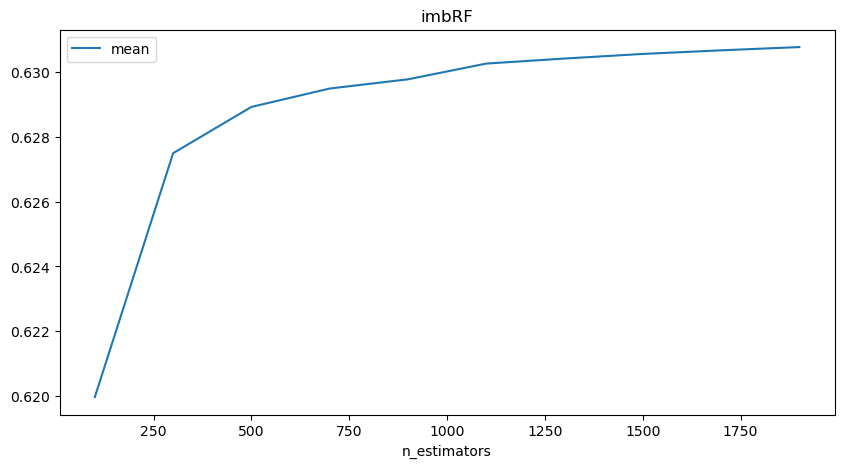

In [8]:
test_res=pd.DataFrame()
param="n_estimators"
for seed in range(5):
    brf_params={
    "n_estimators":range(100,2000,200),


    }
    brf = BalancedRandomForestClassifier(random_state=seed,verbose=0,
                                     oob_score=True,
                                      sampling_strategy=1.0, 
                                      replacement=False,bootstrap=True,

                                      )
    model = GridSearchCV(estimator = brf,param_grid = brf_params,cv=5,scoring="roc_auc",n_jobs=-1,verbose=1)



    print(X_train.shape)
    model.fit(X_train,y_train)
    test_res=pd.concat([test_res,pd.DataFrame(model.cv_results_).sort_values(f"param_{param}",ascending=True).mean_test_score],axis=1)

    print("*************************",model.best_params_,model.best_score_,model)
    print(auc(y_test,model.predict(X_test)))

param_plot(test_res,param,5,range(100,2000,200))

(55976, 63)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
************************* {'max_samples': 0.1, 'n_estimators': 1900} 0.6338929110880054 GridSearchCV(cv=5,
             estimator=BalancedRandomForestClassifier(bootstrap=True,
                                                      oob_score=True,
                                                      random_state=0,
                                                      replacement=False,
                                                      sampling_strategy=1.0),
             n_jobs=-1,
             param_grid={'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                         0.9, 1.0],
                         'n_estimators': [1900]},
             scoring='roc_auc', verbose=1)
0.5972389584452049
(55976, 63)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
************************* {'max_samples': 0.1, 'n_estimators': 1900} 0.6333152493142087 GridSearchCV(cv=5,
          

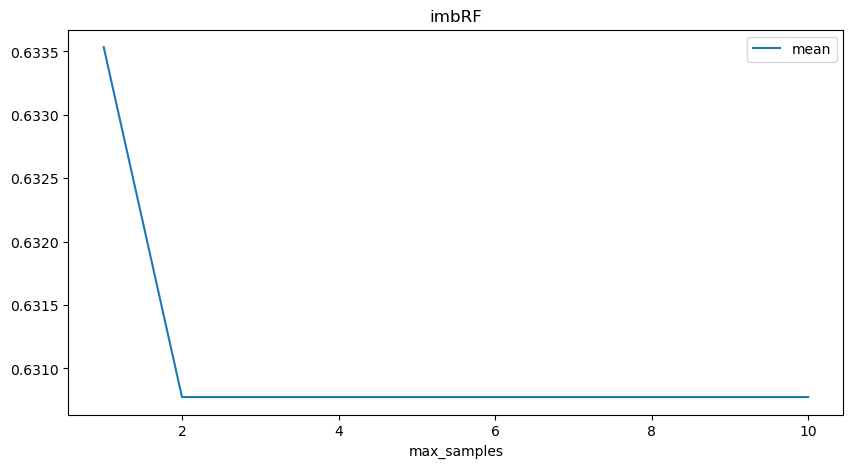

In [9]:
test_res=pd.DataFrame()
param="max_samples"
for seed in range(5):
    brf_params={
    "n_estimators":[1900],
    "max_depth":[9],
    "max_samples":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],


    }
    brf = BalancedRandomForestClassifier(random_state=seed,verbose=0,
                                     oob_score=True,
                                      sampling_strategy=1.0, 
                                      replacement=False,bootstrap=True,
                                      
                                      )
    model = GridSearchCV(estimator = brf,param_grid = brf_params,cv=5,scoring="roc_auc",n_jobs=-1,verbose=1)



    print(X_train.shape)
    model.fit(X_train,y_train)
    test_res=pd.concat([test_res,pd.DataFrame(model.cv_results_).sort_values(f"param_{param}",ascending=True).mean_test_score],axis=1)

    print("*************************",model.best_params_,model.best_score_,model)
    print(auc(y_test,model.predict(X_test)))

param_plot(test_res,param,5,range(1,11))

(55976, 63)
Fitting 5 folds for each of 11 candidates, totalling 55 fits
************************* {'max_depth': 11, 'max_samples': 0.1, 'n_estimators': 1900} 0.6385891998525934 GridSearchCV(cv=5,
             estimator=BalancedRandomForestClassifier(bootstrap=True,
                                                      oob_score=True,
                                                      random_state=0,
                                                      replacement=False,
                                                      sampling_strategy=1.0),
             n_jobs=-1,
             param_grid={'max_depth': range(-1, 20, 2), 'max_samples': [0.1],
                         'n_estimators': [1900]},
             scoring='roc_auc', verbose=1)
0.600677312728832
(55976, 63)
Fitting 5 folds for each of 11 candidates, totalling 55 fits
************************* {'max_depth': 11, 'max_samples': 0.1, 'n_estimators': 1900} 0.6384076691676699 GridSearchCV(cv=5,
             estimator=BalancedR

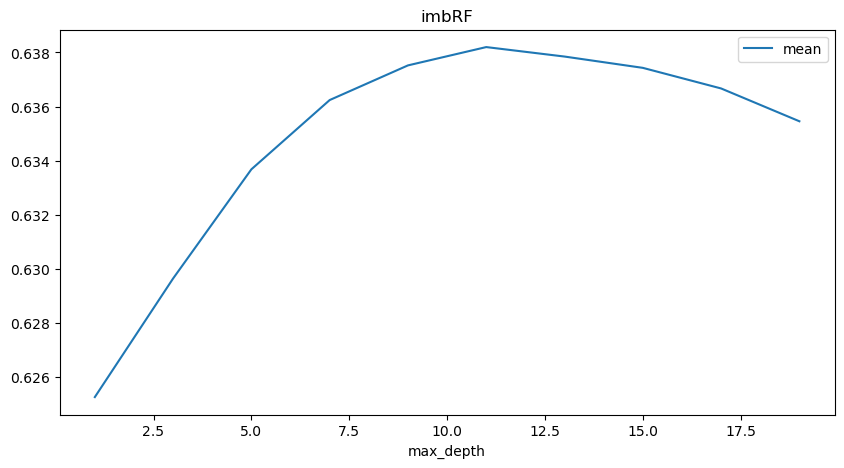

In [10]:
test_res=pd.DataFrame()
param="max_depth"
for seed in range(5):
    brf_params={
    "n_estimators":[1900],
    "max_samples":[0.1,],
        "max_depth":range(-1,20,2)


    }
    brf = BalancedRandomForestClassifier(random_state=seed,verbose=0,
                                     oob_score=True,
                                      sampling_strategy=1.0, 
                                      replacement=False,bootstrap=True,
                                      
                                      )
    model = GridSearchCV(estimator = brf,param_grid = brf_params,cv=5,scoring="roc_auc",n_jobs=-1,verbose=1)



    print(X_train.shape)
    model.fit(X_train,y_train)
    test_res=pd.concat([test_res,pd.DataFrame(model.cv_results_).sort_values(f"param_{param}",ascending=True).mean_test_score],axis=1)

    print("*************************",model.best_params_,model.best_score_,model)
    print(auc(y_test,model.predict(X_test)))

param_plot(test_res,param,5,range(-1,20,2))

In [10]:
import optuna

In [ ]:
def objective(trial,data,target):
    param={
    "n_estimators":[trial.suggest_int("n_estimators",1500,2000)],
    "max_samples":[0.1,],
        "max_depth":[trial.suggest_int("max_depth",9,11)],
        "min_samples_split":[trial.suggest_int("min_samples_split",5,100)],
        "min_samples_leaf":[trial.suggest_int("min_samples_leaf",5,100)],
        "max_features":[trial.suggest_categorical("max_features",["sqrt","log2"])],
        "ccp_alpha":[trial.suggest_float("ccp_alpha",1e-6,1,log=True,)],
        
    }
    brf = BalancedRandomForestClassifier(random_state=0,verbose=0,
                                     oob_score=True,
                                      sampling_strategy=1.0, 
                                      replacement=False,bootstrap=True,
                                      
                                      )

    model = GridSearchCV(estimator = brf,param_grid = param,cv=5,scoring="roc_auc",n_jobs=-1,verbose=0,)



    model.fit(data,target)

    return model.best_score_ - model.cv_results_["std_test_score"][model.best_index_]
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, data=X_train, target=y_train), n_trials=500,)
print("***",study.best_params, study.best_value)

In [ ]:
*** {'n_estimators': 1793, 'max_depth': 11, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'ccp_alpha': 4.2397308838012185e-05} 0.6287857806327202

# final test

In [10]:
#best optuna params
cv_score=[]
test_score=[]
for seed in range(15):
    brf_params={
    "max_samples":[0.1],
    "max_depth":[11],
    'n_estimators':[ 1793],
    'min_samples_split': [22], 
    'min_samples_leaf': [5],
    'max_features': ['sqrt'], 
    'ccp_alpha': [ 4.2397308838012185e-05]
    }
    brf = BalancedRandomForestClassifier(random_state=seed,verbose=0,
                                     oob_score=True,
                                      sampling_strategy=1.0, 
                                      replacement=False,bootstrap=True,
                                      
                                      )
    model = GridSearchCV(estimator = brf,param_grid = brf_params,cv=5,scoring="roc_auc",n_jobs=-1,verbose=1)



    print(X_train.shape)
    model.fit(X_train,y_train)
    #test_res=pd.concat([test_res,pd.DataFrame(model.cv_results_).sort_values(f"param_{param}",ascending=True).mean_test_score],axis=1)
    cv_score.append(model.best_score_)
    test_score.append(auc(y_test,model.predict(X_test)))
    print("***",model.best_params_,model.best_score_,model)
    print(auc(y_test,model.predict(X_test)))
print("cv_score mean:",np.mean(cv_score))
print("test_score mean:",np.mean(test_score))
print("test_score std:",np.std(test_score))
print("cv_score std:",np.std(cv_score))


(55976, 63)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
*** {'ccp_alpha': 4.2397308838012185e-05, 'max_depth': 11, 'max_features': 'sqrt', 'max_samples': 0.1, 'min_samples_leaf': 5, 'min_samples_split': 22, 'n_estimators': 1793} 0.6387246139736578 GridSearchCV(cv=5,
             estimator=BalancedRandomForestClassifier(bootstrap=True,
                                                      oob_score=True,
                                                      random_state=0,
                                                      replacement=False,
                                                      sampling_strategy=1.0),
             n_jobs=-1,
             param_grid={'ccp_alpha': [4.2397308838012185e-05],
                         'max_depth': [11], 'max_features': ['sqrt'],
                         'max_samples': [0.1], 'min_samples_leaf': [5],
                         'min_samples_split': [22], 'n_estimators': [1793]},
             scoring='roc_auc', verbose=1)
0.59787

'cv_score mean: 0.6389286295407619\ntest_score mean: 0.5946477167969406\ntest_score std: 0.0012476595567573134\ncv_score std: 0.00014941012242170596'

In [11]:
#default params
cv_score=[]
test_score=[]
for seed in range(15):
    brf_params={

    'max_features': ['sqrt'], 
  
    }
    brf = BalancedRandomForestClassifier(random_state=seed,verbose=0,)
    model = GridSearchCV(estimator = brf,param_grid = brf_params,cv=5,scoring="roc_auc",n_jobs=-1,verbose=0)



    print(X_train.shape)
    model.fit(X_train,y_train)
    #test_res=pd.concat([test_res,pd.DataFrame(model.cv_results_).sort_values(f"param_{param}",ascending=True).mean_test_score],axis=1)
    cv_score.append(model.best_score_)
    test_score.append(auc(y_test,model.predict(X_test)))
    print("***",model.best_params_,model.best_score_,model)
    print(auc(y_test,model.predict(X_test)))
print("cv_score mean:",np.mean(cv_score))
print("test_score mean:",np.mean(test_score))
print("test_score std:",np.std(test_score))
print("cv_score std:",np.std(cv_score))


(55976, 63)


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

*** {'max_features': 'sqrt'} 0.615844338075046 GridSearchCV(cv=5, estimator=BalancedRandomForestClassifier(random_state=0),
             n_jobs=-1, param_grid={'max_features': ['sqrt']},
             scoring='roc_auc')
0.5912704312665344
(55976, 63)


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

*** {'max_features': 'sqrt'} 0.6197337876902381 GridSearchCV(cv=5, estimator=BalancedRandomForestClassifier(random_state=1),
             n_jobs=-1, param_grid={'max_features': ['sqrt']},
             scoring='roc_auc')
0.5815301631999359
(55976, 63)


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

*** {'max_features': 'sqrt'} 0.6217327254070348 GridSearchCV(cv=5, estimator=BalancedRandomForestClassifier(random_state=2),
             n_jobs=-1, param_grid={'max_features': ['sqrt']},
             scoring='roc_auc')
0.5836969259315669
(55976, 63)


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

*** {'max_features': 'sqrt'} 0.6197825298949784 GridSearchCV(cv=5, estimator=BalancedRandomForestClassifier(random_state=3),
             n_jobs=-1, param_grid={'max_features': ['sqrt']},
             scoring='roc_auc')
0.5892020269655345
(55976, 63)


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

*** {'max_features': 'sqrt'} 0.6227019848422055 GridSearchCV(cv=5, estimator=BalancedRandomForestClassifier(random_state=4),
             n_jobs=-1, param_grid={'max_features': ['sqrt']},
             scoring='roc_auc')
0.5849018401627027
(55976, 63)


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

*** {'max_features': 'sqrt'} 0.6226786873459764 GridSearchCV(cv=5, estimator=BalancedRandomForestClassifier(random_state=5),
             n_jobs=-1, param_grid={'max_features': ['sqrt']},
             scoring='roc_auc')
0.5828313091929324
(55976, 63)


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

*** {'max_features': 'sqrt'} 0.6220845902056718 GridSearchCV(cv=5, estimator=BalancedRandomForestClassifier(random_state=6),
             n_jobs=-1, param_grid={'max_features': ['sqrt']},
             scoring='roc_auc')
0.5959609868868978
(55976, 63)


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

*** {'max_features': 'sqrt'} 0.6237154697476618 GridSearchCV(cv=5, estimator=BalancedRandomForestClassifier(random_state=7),
             n_jobs=-1, param_grid={'max_features': ['sqrt']},
             scoring='roc_auc')
0.5869487275796726
(55976, 63)


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

*** {'max_features': 'sqrt'} 0.6220626670092283 GridSearchCV(cv=5, estimator=BalancedRandomForestClassifier(random_state=8),
             n_jobs=-1, param_grid={'max_features': ['sqrt']},
             scoring='roc_auc')
0.5823113699531102
(55976, 63)


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

*** {'max_features': 'sqrt'} 0.6218608096547659 GridSearchCV(cv=5, estimator=BalancedRandomForestClassifier(random_state=9),
             n_jobs=-1, param_grid={'max_features': ['sqrt']},
             scoring='roc_auc')
0.5907150266975116
(55976, 63)


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

*** {'max_features': 'sqrt'} 0.6187329774172403 GridSearchCV(cv=5, estimator=BalancedRandomForestClassifier(random_state=10),
             n_jobs=-1, param_grid={'max_features': ['sqrt']},
             scoring='roc_auc')
0.5930898589486938
(55976, 63)


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

*** {'max_features': 'sqrt'} 0.6204572660580984 GridSearchCV(cv=5, estimator=BalancedRandomForestClassifier(random_state=11),
             n_jobs=-1, param_grid={'max_features': ['sqrt']},
             scoring='roc_auc')
0.58222317574822
(55976, 63)


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

*** {'max_features': 'sqrt'} 0.6223955907339558 GridSearchCV(cv=5, estimator=BalancedRandomForestClassifier(random_state=12),
             n_jobs=-1, param_grid={'max_features': ['sqrt']},
             scoring='roc_auc')
0.5888681712431223
(55976, 63)


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

*** {'max_features': 'sqrt'} 0.6185958446699475 GridSearchCV(cv=5, estimator=BalancedRandomForestClassifier(random_state=13),
             n_jobs=-1, param_grid={'max_features': ['sqrt']},
             scoring='roc_auc')
0.5930818213917233
(55976, 63)


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

*** {'max_features': 'sqrt'} 0.6249940273775848 GridSearchCV(cv=5, estimator=BalancedRandomForestClassifier(random_state=14),
             n_jobs=-1, param_grid={'max_features': ['sqrt']},
             scoring='roc_auc')
0.5911290390678435
cv_score mean: 0.6211582197419756
test_score mean: 0.5878507249490668
test_score std: 0.0045340032589093315
cv_score std: 0.002237211264736001


In [9]:
feature_importance=pd.DataFrame()
feature_name=[]
test_score=[]
for seed in range(15):
    brf_params={
    "max_samples":0.1,
    "max_depth":11,
    'n_estimators': 1793,
    'min_samples_split': 22, 
    'min_samples_leaf': 5,
    'max_features': 'sqrt', 
    'ccp_alpha': 4.2397308838012185e-05,
    }
    model = BalancedRandomForestClassifier(**brf_params,random_state=seed,verbose=0,
                                     oob_score=True,
                                      sampling_strategy=1.0, 
                                      replacement=False,bootstrap=True,
                                      
                                      )


    print(X_train.shape)
    model.fit(X_train,y_train)
    #test_res=pd.concat([test_res,pd.DataFrame(model.cv_results_).sort_values(f"param_{param}",ascending=True).mean_test_score],axis=1)
    feature_importance=pd.concat([feature_importance,pd.DataFrame(model.feature_importances_,index=fn)],axis=1)

    test_score.append(auc(y_test,model.predict(X_test)))
    #print("***",model.best_params_,model.best_score_,model)
    print(auc(y_test,model.predict(X_test)))

print("test_score mean:",np.mean(test_score))
print("test_score std:",np.std(test_score))


""""""

(55976, 63)
0.5978787729996882
(55976, 63)
0.5983223398110205
(55976, 63)
0.596622787443522
(55976, 63)
0.5972626019980053
(55976, 63)
0.5991584021086547
(55976, 63)
0.5979239334365185
(55976, 63)
0.5973626179792957
(55976, 63)
0.5983164289228204
(55976, 63)
0.5985637479910018
(55976, 63)
0.5999277870854286
(55976, 63)
0.5962518088412502
(55976, 63)
0.5985852648750316
(55976, 63)
0.596813124298473
(55976, 63)
0.5979750047615487
(55976, 63)
0.5983615893596507
test_score mean: 0.5979550807941274
test_score std: 0.0009436028658618249


''

In [12]:
feature_importance["mean"]=feature_importance.mean(1)

<Axes: title={'center': 'Feature importance imbRF'}, xlabel='feat_name'>

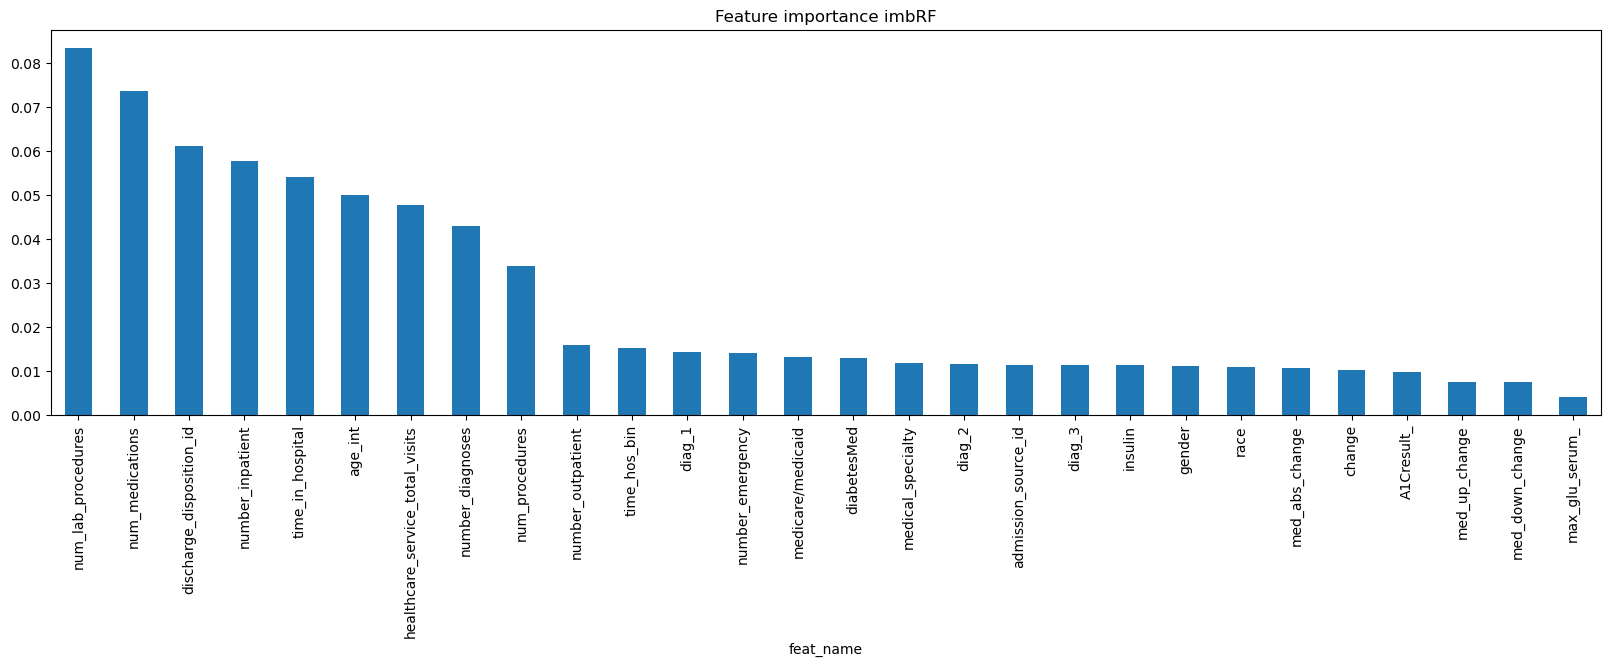

In [13]:
sig_df=feature_importance.sort_values(by="mean",ascending=False)#.plot(kind="barh",x="feat",figsize=(5,5))
sig_df["feat_name"]=sig_df.index.str.split("_")
sig_df["feat_name"]=[i[2:-1] if i[0] == "cat" else i[2:] for i in sig_df["feat_name"]]#[i[2:-1] for i in sig_df["feat_name"]]
sig_df["feat_name"]=sig_df["feat_name"].str.join("_")
sig_df.index=sig_df["feat_name"]
sig_df.drop_duplicates("feat_name")["mean"].plot(kind="bar",figsize=(20,5),title="Feature importance imbRF")